# Library import

In [2]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd


import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


%matplotlib inline

In [3]:
train_audio_path='VideoProc'
audiofile='d1.wav'
sample_rate, samples= wavfile.read(str(train_audio_path) + '\\' + audiofile)
print(sample_rate)
print(samples.shape)
samples=samples[:,0]
print(len(samples))

16000
(43008, 2)
43008


In [4]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [6]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

#  Wave and Spectrogram

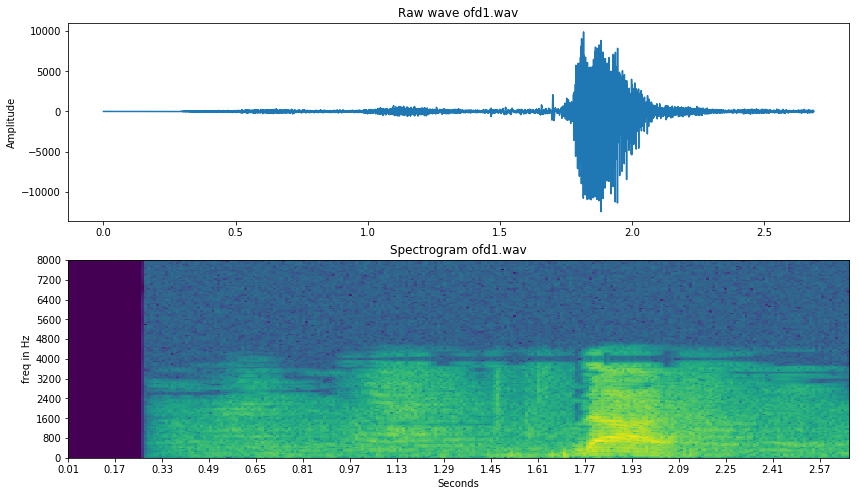

In [7]:
fig= plt.figure(figsize=(14,8))
ax1=fig.add_subplot(211)
ax1.set_title("Raw wave of"+ audiofile)
ax1.set_ylabel("Amplitude")
ax1.plot(np.linspace(0, len(samples)/sample_rate,len(samples)),samples)

ax2=fig.add_subplot(212)
ax2.set_title("Spectrogram of"+ audiofile)
ax2.imshow(spectrogram.T, aspect='auto', origin=' lower', extent=[times.min(),times.max(),freqs.min(),freqs.max()])
ax2.set_ylabel("freq in Hz")
ax2.set_xlabel("Seconds")
ax2.set_xticks(times[: :16])
ax2.set_yticks(freqs[: :16])

# Mean spectrogram

In [8]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram_new = (spectrogram - mean) / std

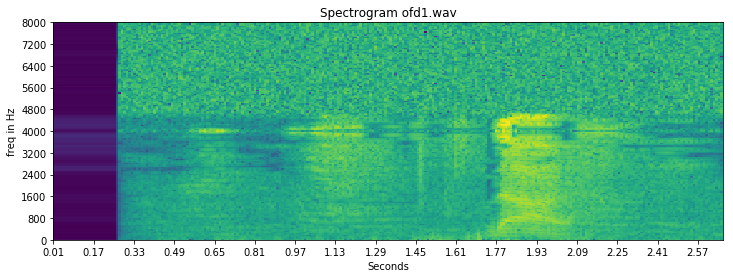

In [9]:
fig1=plt.figure(figsize=(12,4))
ax3=fig1.add_subplot(111)
ax3.set_title("Spectrogram of"+ audiofile)
ax3.imshow(spectrogram_new.T, aspect='auto', origin=' lower', extent=[times.min(),times.max(),freqs.min(),freqs.max()])
ax3.set_ylabel("freq in Hz")
ax3.set_xlabel("Seconds")
ax3.set_xticks(times[: :16])
ax3.set_yticks(freqs[: :16])


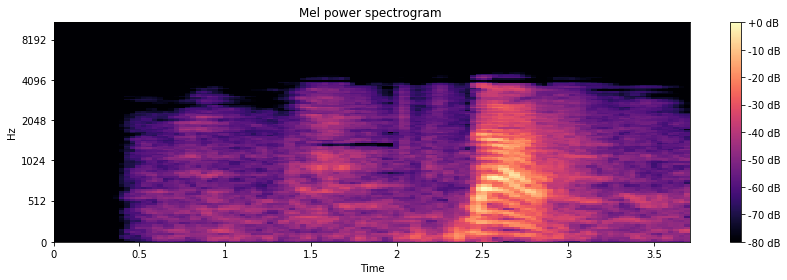

In [12]:
samples_1, sample_rate_1= librosa.load(str(train_audio_path) +"/"+ audiofile)

S = librosa.feature.melspectrogram(samples_1, sr=sample_rate_1, n_mels=128)

log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# MFCC

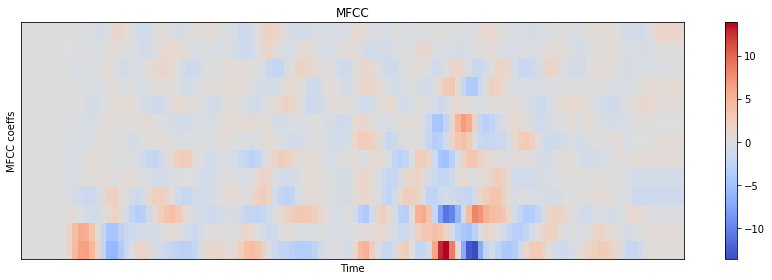

In [13]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [14]:
ipd.Audio(samples, rate=sample_rate)

In [15]:
cut_samples= samples[4000:13000]
ipd.Audio(cut_samples, rate=sample_rate)